# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - mean
    X_test_centered = X_test - mean

    # Covariance matrix
    covariance = (1/(X_train.shape[0] - 1)) * np.dot(X_train_centered.T, X_train_centered)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    U = eigenvectors  # U represents the eigenvectors (principal components)

    # Project data to lower-dimensional space
    X_train_reduced = np.dot(X_train_centered, U[:, :n_components])
    X_test_reduced = np.dot(X_test_centered, U[:, :n_components])

    return X_train_reduced, X_test_reduced, U  # Return U as well

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
# List of components for SVD
svd_components = [784, 400, 200, 100, 50]  # You can adjust these numbers as needed

# Store the results
results = []
U_full = None  # To store U when n_components = 784

print("Training models with different levels of SVD preprocessing...")

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, U = apply_svd_custom(X_train, X_test, n_components)

    # Save U if n_components is 784 (or whichever number you need for visualization)
    if n_components == 784:  # Adjust as needed
        U_full = U

    # Ensure the SVD components are real (in case any complex numbers sneak in)
    X_train_svd = np.real(X_train_svd)
    X_test_svd = np.real(X_test_svd)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results in a list of dictionaries
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 590.5023 seconds
Applying custom SVD with 400 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.9196, Training time: 286.9423 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 98.7589 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 45.1397 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 14.1431 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


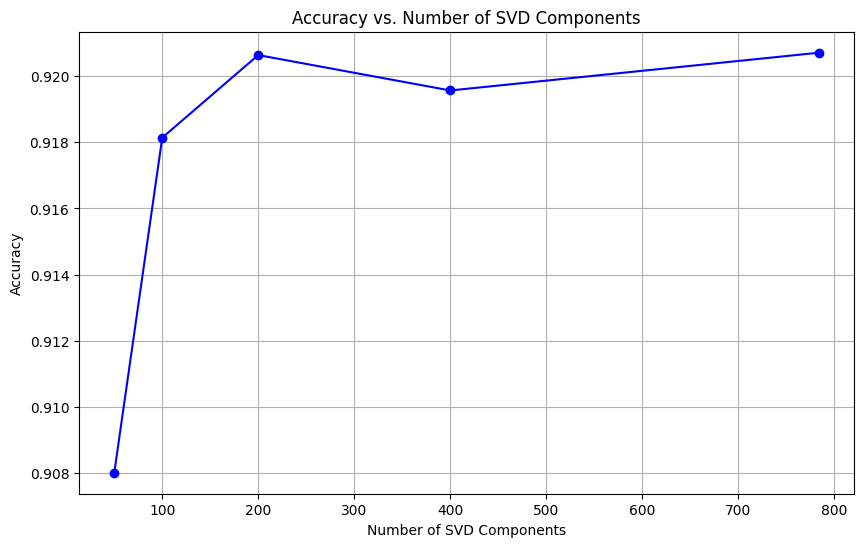

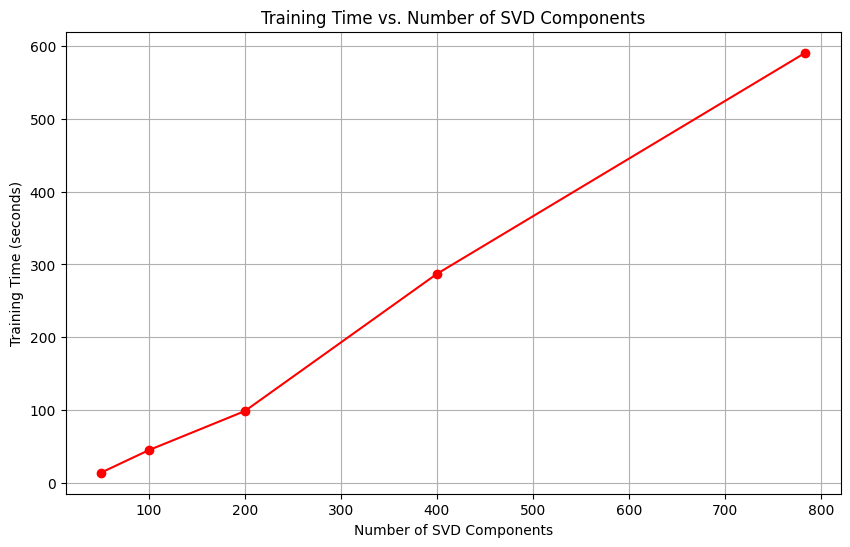

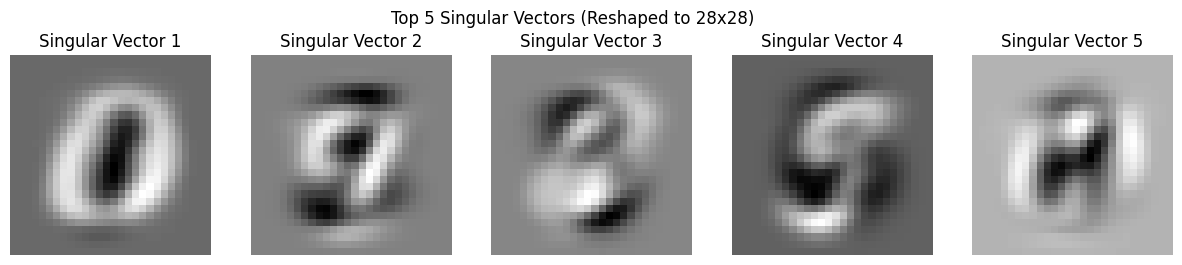

In [6]:
import matplotlib.pyplot as plt

# Assuming `results` contains the results from Part 4
# results = [{"n_components": 784, "accuracy": 0.95, "training_time": 5.5}, ...]

# Extract the number of components, accuracy, and training time
n_components_list = [result['n_components'] for result in results]
accuracy_list = [result['accuracy'] for result in results]
training_time_list = [result['training_time'] for result in results]

# 1. Plot Accuracy vs. Number of SVD Components
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, accuracy_list, marker='o', color='b')
plt.title("Accuracy vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# 2. Plot Training Time vs. Number of SVD Components
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, training_time_list, marker='o', color='r')
plt.title("Training Time vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (seconds)")
plt.grid(True)
plt.show()

# 3. Visualize the Top 5 Singular Vectors (Principal Components)
if U_full is not None:
    top_5_singular_vectors = U_full[:, :5]  # Get the first 5 singular vectors

    plt.figure(figsize=(15, 3))
    for i in range(5):
        singular_vector_image = np.real(top_5_singular_vectors[:, i]).reshape(28, 28)  # Reshape to 28x28 image
        plt.subplot(1, 5, i+1)  # Create a subplot for each image
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')  # Turn off axis labels for a cleaner look

    plt.suptitle("Top 5 Singular Vectors (Reshaped to 28x28)")
    plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

The analysis reveals that using around 200 SVD components provides an optimal balance between accuracy and training time. The accuracy increases significantly as we move from 50 to 200 components, peaking at approximately 0.920, and then stabilizing with only marginal improvements as the number of components increases. Meanwhile, training time grows almost linearly with the number of components, highlighting the computational cost of higher-dimensional data. Visualizing the top 5 singular vectors shows that these components capture the most important variance in the dataset, resembling general digit shapes. Therefore, 200 components appear to retain essential information while minimizing computational overhead, making it the ideal choice for achieving both high accuracy and efficient model training.






